In [152]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [153]:
import pandas as pd
data = pd.read_csv('overall_data.csv')

In [154]:
data

,headline_cpi,core_cpi,inf_expectation,gdp,year,quarter,potential_gdp,output_gap,unemployment
0,1.1,-4.1,1.5,5.7,1999,4,3.385730,68.353654,5.8
1,0.8,3.7,2.3,4.9,2000,1,3.330380,47.130344,5.8
2,0.6,-3.1,2.4,2.8,2000,2,3.268623,-14.337013,5.5
3,0.8,4.8,2.2,2.4,2000,3,3.203238,-25.075807,5.3
4,1.0,-3.1,2.3,2.4,2000,4,3.136712,-23.486755,5.2
...,...,...,...,...,...,...,...,...,...
92,10.7,0.0,4.8,1.2,2022,4,3.335138,-64.019477,3.9
93,10.2,14.3,3.9,0.4,2023,1,3.027886,-86.789462,4.0
94,8.4,5.2,3.5,0.0,2023,2,2.711156,-100.000000,4.2
95,6.7,3.8,3.6,-0.4,2023,3,2.389843,-116.737499,4.1


In [155]:
p = data['headline_cpi']
p


0      1.1
1      0.8
2      0.6
3      0.8
4      1.0
      ... 
92    10.7
93    10.2
94     8.4
95     6.7
96     4.2
Name: headline_cpi, Length: 97, dtype: float64

In [156]:
data['g_t_lag1'] = data['headline_cpi'].shift(1)
data['g_t_lag2'] = data['headline_cpi'].shift(2)
data['g_t_lag3'] = data['headline_cpi'].shift(3)
data['g_t_lag4'] = data['headline_cpi'].shift(4)
data['g_t_lead4'] = data['headline_cpi'].shift(-4)

In [157]:
data['diff_t'] = data['headline_cpi'] - data['g_t_lag1']
data['diff_t1'] = data['g_t_lag1'] - data['g_t_lag2']
data['diff_t2'] = data['g_t_lag2'] - data['g_t_lag3']
data['diff_t3'] = data['g_t_lag3'] - data['g_t_lag4']
data['y_t'] = data['g_t_lead4'] - data['headline_cpi']

In [158]:
data

,headline_cpi,core_cpi,inf_expectation,gdp,year,quarter,potential_gdp,output_gap,unemployment,g_t_lag1,g_t_lag2,g_t_lag3,g_t_lag4,g_t_lead4,diff_t,diff_t1,diff_t2,diff_t3,y_t
0,1.1,-4.1,1.5,5.7,1999,4,3.385730,68.353654,5.8,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-0.1
1,0.8,3.7,2.3,4.9,2000,1,3.330380,47.130344,5.8,1.1,NaN,NaN,NaN,0.9,-0.3,NaN,NaN,NaN,0.1
2,0.6,-3.1,2.4,2.8,2000,2,3.268623,-14.337013,5.5,0.8,1.1,NaN,NaN,1.5,-0.2,-0.3,NaN,NaN,0.9
3,0.8,4.8,2.2,2.4,2000,3,3.203238,-25.075807,5.3,0.6,0.8,1.1,NaN,1.5,0.2,-0.2,-0.3,NaN,0.7
4,1.0,-3.1,2.3,2.4,2000,4,3.136712,-23.486755,5.2,0.8,0.6,0.8,1.1,1.0,0.2,0.2,-0.2,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,10.7,0.0,4.8,1.2,2022,4,3.335138,-64.019477,3.9,10.0,9.2,6.2,4.9,4.2,0.7,0.8,3.0,1.3,-6.5
93,10.2,14.3,3.9,0.4,2023,1,3.027886,-86.789462,4.0,10.7,10.0,9.2,6.2,NaN,-0.5,0.7,0.8,3.0,NaN
94,8.4,5.2,3.5,0.0,2023,2,2.711156,-100.000000,4.2,10.2,10.7,10.0,9.2,NaN,-1.8,-0.5,0.7,0.8,NaN
95,6.7,3.8,3.6,-0.4,2023,3,2.389843,-116.737499,4.1,8.4,10.2,10.7,10.0,NaN,-1.7,-1.8,-0.5,0.7,NaN


In [159]:
data = data.dropna()
data

,headline_cpi,core_cpi,inf_expectation,gdp,year,quarter,potential_gdp,output_gap,unemployment,g_t_lag1,g_t_lag2,g_t_lag3,g_t_lag4,g_t_lead4,diff_t,diff_t1,diff_t2,diff_t3,y_t
4,1.0,-3.1,2.3,2.4,2000,4,3.136712,-23.486755,5.2,0.8,0.6,0.8,1.1,1.0,0.2,0.2,-0.2,-0.3,0.0
5,0.9,4.8,2.1,3.6,2001,1,3.071030,17.224499,5.1,1.0,0.8,0.6,0.8,1.5,-0.1,0.2,0.2,-0.2,0.6
6,1.5,0.0,2.1,1.6,2001,2,3.007718,-46.803525,5.0,0.9,1.0,0.8,0.6,0.9,0.6,-0.1,0.2,0.2,-0.6
7,1.5,3.1,2.2,2.0,2001,3,2.948630,-32.171893,5.1,1.5,0.9,1.0,0.8,1.0,0.0,0.6,-0.1,0.2,-0.5
8,1.0,-1.0,1.9,1.2,2001,4,2.894742,-58.545528,5.2,1.5,1.5,0.9,1.0,1.5,-0.5,0.0,0.6,-0.1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,4.9,2.5,3.2,6.1,2021,4,4.315527,41.350052,4.2,2.8,2.1,0.6,0.5,10.7,2.1,0.7,1.5,0.1,5.8
89,6.2,9.8,4.3,2.8,2022,1,4.127300,-32.159032,3.9,4.9,2.8,2.1,0.6,10.2,1.3,2.1,0.7,1.5,4.0
90,9.2,5.2,4.6,1.2,2022,2,3.893725,-69.181181,3.9,6.2,4.9,2.8,2.1,8.4,3.0,1.3,2.1,0.7,-0.8
91,10.0,8.3,4.9,0.4,2022,3,3.626375,-88.969700,3.8,9.2,6.2,4.9,2.8,6.7,0.8,3.0,1.3,2.1,-3.3


In [160]:
X = data[['diff_t', 'diff_t1', 'diff_t2', 'diff_t3']]
X = sm.add_constant(X)  # свободного члена
y = data['y_t']

In [161]:
model = sm.OLS(y, X).fit()

In [162]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_t   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.300
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0654
Time:                        03:09:22   Log-Likelihood:                -183.45
No. Observations:                  89   AIC:                             376.9
Df Residuals:                      84   BIC:                             389.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2958      0.212      1.395      0.1

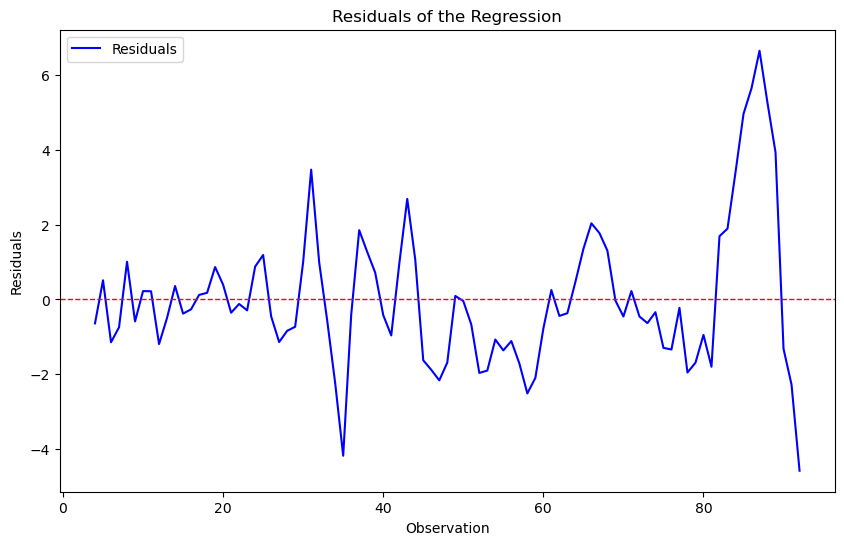

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(model.resid, label="Residuals", color="blue")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals of the Regression")
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [164]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.300
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0654
Time:                        03:09:22   Log-Likelihood:                -183.45
No. Observations:                  89   AIC:                             376.9
Df Residuals:                      84   BIC:                             389.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2958      0.212      1.395      0.167      -0.126       0.717
diff_t         0.7285      0.371      1.965      0.053      -0.009       1.466
diff_t1       -0.1350      0.401     -0.337      0.737      -0.932       0.662
diff_t2       -0.7716      0.404     -1.909      0.060      -1.575       0.032
diff_t3       -0.2335      0.427     -0.546      0.586      -1.083       0.616
==============================================================================
Omnibus:                       22.089   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.794
Skew:                           1.058   Prob(JB):                     4.59e-08
Kurtosis:                       5.153   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
model.predict(X)
max(model.predict(X))

1.7620934557349872

In [166]:
data1=pd.DataFrame(model.predict(X))
data1

,0
4,0.638884
5,0.088360
6,0.545430
7,0.245269
8,-0.508007
...,...
88,0.550491
89,0.068997
90,0.522101
91,-1.019813


# Спецификация 2


## Вариант 1: y=t4 и x=t4-t

In [167]:
data = pd.read_csv('overall_data.csv')
data['g_t_4'] = data['headline_cpi'].shift(-4)
data['temp'] = data['g_t_4'] - data['headline_cpi']
data['y_tnaive'] = data['g_t_4']

In [168]:
data = data.dropna()
data

,headline_cpi,core_cpi,inf_expectation,gdp,year,quarter,potential_gdp,output_gap,unemployment,g_t_4,temp,y_tnaive
0,1.1,-4.1,1.5,5.7,1999,4,3.385730,68.353654,5.8,1.0,-0.1,1.0
1,0.8,3.7,2.3,4.9,2000,1,3.330380,47.130344,5.8,0.9,0.1,0.9
2,0.6,-3.1,2.4,2.8,2000,2,3.268623,-14.337013,5.5,1.5,0.9,1.5
3,0.8,4.8,2.2,2.4,2000,3,3.203238,-25.075807,5.3,1.5,0.7,1.5
4,1.0,-3.1,2.3,2.4,2000,4,3.136712,-23.486755,5.2,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,4.9,2.5,3.2,6.1,2021,4,4.315527,41.350052,4.2,10.7,5.8,10.7
89,6.2,9.8,4.3,2.8,2022,1,4.127300,-32.159032,3.9,10.2,4.0,10.2
90,9.2,5.2,4.6,1.2,2022,2,3.893725,-69.181181,3.9,8.4,-0.8,8.4
91,10.0,8.3,4.9,0.4,2022,3,3.626375,-88.969700,3.8,6.7,-3.3,6.7


In [169]:
X = data[['temp']]
X = sm.add_constant(X)  # свободного члена
y = data['y_tnaive']
model = sm.OLS(y, X).fit()
data2=pd.DataFrame(model.predict(X))
data2

,0
0,2.335176
1,2.464915
2,2.983871
3,2.854132
4,2.400045
...,...
88,6.162476
89,4.994825
90,1.881089
91,0.259351


In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_tnaive   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     50.52
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.58e-10
Time:                        03:09:24   Log-Likelihood:                -181.70
No. Observations:                  93   AIC:                             367.4
Df Residuals:                      91   BIC:                             372.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4000      0.181     13.276      0.000       2.041       2.759
temp           0.6487      0.091      7.108      0.000       0.467       0.830
==============================================================================
Omnibus:                       53.678   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.052
Skew:                           2.069   Prob(JB):                     6.47e-36
Kurtosis:                       7.970   Cond. No.                         2.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
max(model.predict(X))

7.070649331744526

In [172]:
min(model.predict(X))

-1.816472697437475

## Вариант 2: y=t4 и x=t-t4

In [173]:
data = pd.read_csv('overall_data.csv')
data['g_t_4'] = data['headline_cpi'].shift(-4)
data['temp'] = data['headline_cpi'] - data['g_t_4']
data['y_tnaive'] = data['g_t_4']

In [174]:
data = data.dropna()
X = data[['temp']]
X = sm.add_constant(X)  # свободного члена
y = data['y_tnaive']
model = sm.OLS(y, X).fit()
data2=pd.DataFrame(model.predict(X))
data2

,0
0,2.335176
1,2.464915
2,2.983871
3,2.854132
4,2.400045
...,...
88,6.162476
89,4.994825
90,1.881089
91,0.259351


In [175]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_tnaive   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     50.52
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.58e-10
Time:                        03:09:26   Log-Likelihood:                -181.70
No. Observations:                  93   AIC:                             367.4
Df Residuals:                      91   BIC:                             372.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4000      0.181     13.276      0.000       2.041       2.759
temp          -0.6487      0.091     -7.108      0.000      -0.830      -0.467
==============================================================================
Omnibus:                       53.678   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.052
Skew:                           2.069   Prob(JB):                     6.47e-36
Kurtosis:                       7.970   Cond. No.                         2.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
max(model.predict(X))

7.070649331744526

In [177]:
min(model.predict(X))

-1.816472697437475

## Вариант 3: y=t4-t и x=t-t4

In [178]:
data = pd.read_csv('overall_data.csv')
data['g_t_4'] = data['headline_cpi'].shift(-4)
data['temp'] = data['headline_cpi']-data['g_t_4']
data['y_tnaive'] =data['headline_cpi']-data['g_t_4'] 
data = data.dropna()
data
X = data[['temp']]
X = sm.add_constant(X)  # свободного члена
y = data['y_tnaive']
model = sm.OLS(y, X).fit()
data2=pd.DataFrame(model.predict(X))
data2

,0
0,1.000000e-01
1,-1.000000e-01
2,-9.000000e-01
3,-7.000000e-01
4,-4.857226e-17
...,...
88,-5.800000e+00
89,-4.000000e+00
90,8.000000e-01
91,3.300000e+00


In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_tnaive   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.709e+33
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:09:29   Log-Likelihood:                 3153.9
No. Observations:                  93   AIC:                            -6304.
Df Residuals:                      91   BIC:                            -6299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.857e-17   4.79e-17     -1.014      0.313   -1.44e-16    4.66e-17
temp           1.0000   2.42e-17   4.13e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       27.962   Durbin-Watson:                   0.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.721
Skew:                          -0.731   Prob(JB):                     2.05e-30
Kurtosis:                       8.757   Cond. No.                         2.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
max(model.predict(X))

6.499999999999997

In [181]:
min(model.predict(X))

-7.199999999999998

## Вариант 4: y=t4-t и x=t4-t

In [182]:
data = pd.read_csv('overall_data.csv')
data['g_t_4'] = data['headline_cpi'].shift(-4)
data['temp'] = data['g_t_4'] - data['headline_cpi']
data['y_tnaive'] = data['g_t_4'] - data['headline_cpi']
data = data.dropna()
data
X = data[['temp']]
X = sm.add_constant(X)  # свободного члена
y = data['y_tnaive']
model = sm.OLS(y, X).fit()
data2=pd.DataFrame(model.predict(X))
data2

,0
0,-1.000000e-01
1,1.000000e-01
2,9.000000e-01
3,7.000000e-01
4,4.857226e-17
...,...
88,5.800000e+00
89,4.000000e+00
90,-8.000000e-01
91,-3.300000e+00


In [183]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_tnaive   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.709e+33
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:09:31   Log-Likelihood:                 3153.9
No. Observations:                  93   AIC:                            -6304.
Df Residuals:                      91   BIC:                            -6299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.857e-17   4.79e-17      1.014      0.313   -4.66e-17    1.44e-16
temp           1.0000   2.42e-17   4.13e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       27.962   Durbin-Watson:                   0.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.721
Skew:                           0.731   Prob(JB):                     2.05e-30
Kurtosis:                       8.757   Cond. No.                         2.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
max(model.predict(X))

7.199999999999998

In [185]:
min(model.predict(X))

-6.499999999999997

# Вариант с темпом прироста
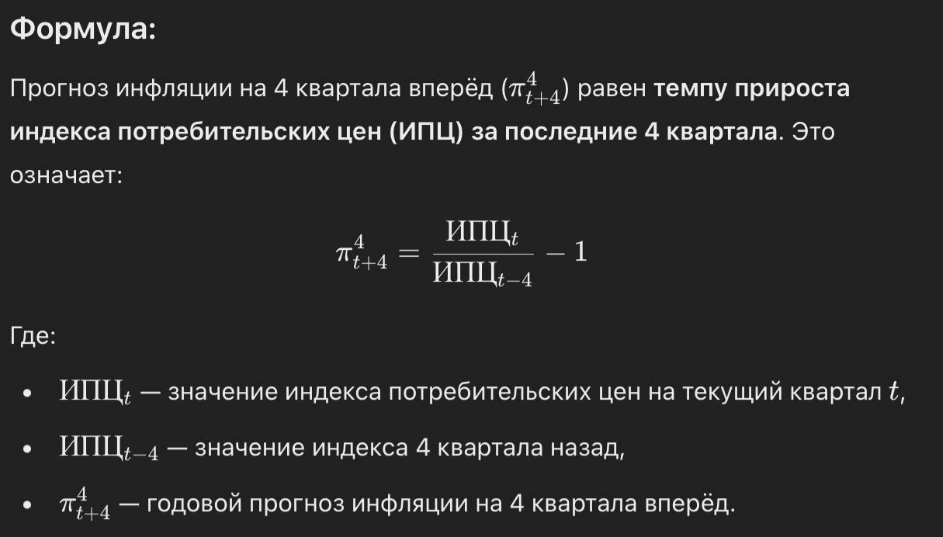


In [186]:
data = pd.read_csv('overall_data.csv')
data['g_t_4'] = data['headline_cpi'].shift(-4)
data['temp'] = (data['g_t_4'] - data['headline_cpi'])/(data['headline_cpi'])
data['y_tnaive'] = data['g_t_4'] 

In [187]:
data = data.dropna()
data


,headline_cpi,core_cpi,inf_expectation,gdp,year,quarter,potential_gdp,output_gap,unemployment,g_t_4,temp,y_tnaive
0,1.1,-4.1,1.5,5.7,1999,4,3.385730,68.353654,5.8,1.0,-0.090909,1.0
1,0.8,3.7,2.3,4.9,2000,1,3.330380,47.130344,5.8,0.9,0.125000,0.9
2,0.6,-3.1,2.4,2.8,2000,2,3.268623,-14.337013,5.5,1.5,1.500000,1.5
3,0.8,4.8,2.2,2.4,2000,3,3.203238,-25.075807,5.3,1.5,0.875000,1.5
4,1.0,-3.1,2.3,2.4,2000,4,3.136712,-23.486755,5.2,1.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,4.9,2.5,3.2,6.1,2021,4,4.315527,41.350052,4.2,10.7,1.183673,10.7
89,6.2,9.8,4.3,2.8,2022,1,4.127300,-32.159032,3.9,10.2,0.645161,10.2
90,9.2,5.2,4.6,1.2,2022,2,3.893725,-69.181181,3.9,8.4,-0.086957,8.4
91,10.0,8.3,4.9,0.4,2022,3,3.626375,-88.969700,3.8,6.7,-0.330000,6.7


In [188]:
X = data[['temp']]
X = sm.add_constant(X)  # свободного члена
y = data['y_tnaive']
model = sm.OLS(y, X).fit()
data2=pd.DataFrame(model.predict(X))
data2

MissingDataError: exog contains inf or nans